### Import Pakage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imageio, glob, cv2
from PIL import Image
from tqdm import tqdm

from utils import CelebA_Datasets
from model import Discriminator, Generator, weights_init

import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Load Datasets

In [2]:
celebA_dataset = CelebA_Datasets(data_type = 'NonSmileWoman')
train_loader = DataLoader(celebA_dataset, batch_size=200, shuffle=True)

### Load DCGAN

In [3]:
discriminator = Discriminator().to(device)
generator     = Generator().to(device)

weights_init(discriminator)
weights_init(generator)

### Hyper paramter Setting

In [4]:
criterion = nn.BCELoss()

learning_rate = 2*1e-4
d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(.5, .5))
g_optimizer = torch.optim.Adam(generator.parameters(), lr=learning_rate, betas=(.5, .5))

epoches = 10

### Train

In [5]:
d_loss_list = [] # train
g_loss_list = [] # train

for epoch in range(epoches):
  print("----Epoch [ {}/{} ]----".format(epoches, epoch))
  
  for batch_i, image in enumerate(tqdm(train_loader)):
    batch_len = image.size()[0]

    real_label = torch.full((batch_len, 1), 1, dtype=torch.float32).to(device)
    fake_label = torch.full((batch_len, 1), 0, dtype=torch.float32).to(device)

    real_images = image.to(device)
    z = torch.randn(batch_len, 100, 1, 1).to(device)

    '''
        [train Discriminator]
    '''
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    
    fake_images = generator(z)

    fake_loss = criterion(discriminator(fake_images), fake_label)
    real_loss = criterion(discriminator(real_images), real_label) 
    d_loss = (fake_loss + real_loss) / 2

    d_loss.backward()
    d_optimizer.step()

    '''
        [train Generator]
    '''
    d_optimizer.zero_grad()
    g_optimizer.zero_grad()
    
    fake_images = generator(z)
    
    g_loss = criterion(discriminator(fake_images), real_label)
    g_loss.backward()
    g_optimizer.step()

    d_loss_list.append(d_loss.item())
    g_loss_list.append(g_loss.item())
    
    if (batch_i + 1) % 200 == 0 or (batch_i + 1) == len(train_loader):
      print("Epoch [ {}/{} ]  Step [ {}/{} ]  d_loss : {:.5f}  g_loss : {:.5f}"\
            .format(epoches, epoch, batch_i+1, len(train_loader), d_loss.item(), g_loss.item()))
  
  
  torch.save(generator.state_dict(), 'weights/DCGAN_generator_epoch{}.pt'.format(epoch+1))
  torch.save(discriminator.state_dict(), 'weights/DCGAN_discriminator_epoch{}.pt'.format(epoch+1))

----Epoch [ 10/0 ]----


 74%|███████▎  | 200/272 [05:00<01:44,  1.45s/it]

Epoch [ 10/0 ]  Step [ 200/272 ]  d_loss : 0.45584  g_loss : 4.12758


100%|██████████| 272/272 [06:45<00:00,  1.49s/it]


Epoch [ 10/0 ]  Step [ 272/272 ]  d_loss : 0.38065  g_loss : 4.29050
----Epoch [ 10/1 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.47it/s]

Epoch [ 10/1 ]  Step [ 200/272 ]  d_loss : 0.52652  g_loss : 3.40738


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/1 ]  Step [ 272/272 ]  d_loss : 0.22941  g_loss : 2.27557
----Epoch [ 10/2 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.47it/s]

Epoch [ 10/2 ]  Step [ 200/272 ]  d_loss : 0.25294  g_loss : 4.13962


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/2 ]  Step [ 272/272 ]  d_loss : 0.25807  g_loss : 3.21320
----Epoch [ 10/3 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.46it/s]

Epoch [ 10/3 ]  Step [ 200/272 ]  d_loss : 0.11564  g_loss : 4.23553


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/3 ]  Step [ 272/272 ]  d_loss : 0.71099  g_loss : 5.87642
----Epoch [ 10/4 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.45it/s]

Epoch [ 10/4 ]  Step [ 200/272 ]  d_loss : 0.26664  g_loss : 5.76058


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/4 ]  Step [ 272/272 ]  d_loss : 0.11013  g_loss : 4.70703
----Epoch [ 10/5 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.46it/s]

Epoch [ 10/5 ]  Step [ 200/272 ]  d_loss : 0.18182  g_loss : 3.00423


100%|██████████| 272/272 [03:05<00:00,  1.46it/s]


Epoch [ 10/5 ]  Step [ 272/272 ]  d_loss : 0.09630  g_loss : 3.83346
----Epoch [ 10/6 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.46it/s]

Epoch [ 10/6 ]  Step [ 200/272 ]  d_loss : 0.10245  g_loss : 6.75324


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/6 ]  Step [ 272/272 ]  d_loss : 0.11714  g_loss : 4.00516
----Epoch [ 10/7 ]----


 74%|███████▎  | 200/272 [02:17<00:49,  1.46it/s]

Epoch [ 10/7 ]  Step [ 200/272 ]  d_loss : 0.36964  g_loss : 2.54713


100%|██████████| 272/272 [03:06<00:00,  1.46it/s]


Epoch [ 10/7 ]  Step [ 272/272 ]  d_loss : 0.16368  g_loss : 5.91319
----Epoch [ 10/8 ]----


 74%|███████▎  | 200/272 [02:16<00:49,  1.45it/s]

Epoch [ 10/8 ]  Step [ 200/272 ]  d_loss : 0.35052  g_loss : 6.37141


100%|██████████| 272/272 [03:05<00:00,  1.47it/s]


Epoch [ 10/8 ]  Step [ 272/272 ]  d_loss : 0.32450  g_loss : 6.11362
----Epoch [ 10/9 ]----


 74%|███████▎  | 200/272 [02:17<00:49,  1.46it/s]

Epoch [ 10/9 ]  Step [ 200/272 ]  d_loss : 1.28207  g_loss : 3.22760


100%|██████████| 272/272 [03:06<00:00,  1.46it/s]

Epoch [ 10/9 ]  Step [ 272/272 ]  d_loss : 0.29457  g_loss : 4.73228


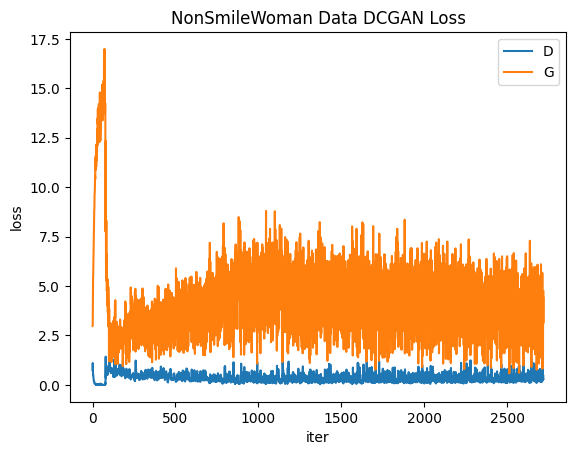

In [8]:
plt.title("NonSmileWoman Data DCGAN Loss")
plt.xlabel('iter')
plt.ylabel('loss')
plt.plot(d_loss_list)
plt.plot(g_loss_list)
plt.legend(['D', 'G'])
plt.savefig('result/NonSmileWoman.png')
plt.show()

### Inference (Epoch = 1, 5, 10)

In [22]:
unnormalize = transforms.Normalize((-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5), (1.0 / 0.5, 1.0 / 0.5, 1.0 / 0.5))
fixed_z = torch.randn(16, 100, 1, 1).to(device)

In [105]:
frame = torch.zeros(3, 256, 256)

model_path = 'weights/nonsmilewoman/DCGAN_generator_epoch10.pt'

generator = Generator().to(device)
generator.load_state_dict(torch.load(model_path))

fixed_fake_images = generator(fixed_z)
fixed_fake_images = fixed_fake_images.detach().to('cpu')
fixed_fake_images = unnormalize(fixed_fake_images)

cnt = 0
for r in range(4):
    for c in range(4):
        frame[:,r*64:(r+1)*64, c*64:(c+1)*64] = fixed_fake_images[cnt]
        cnt+=1

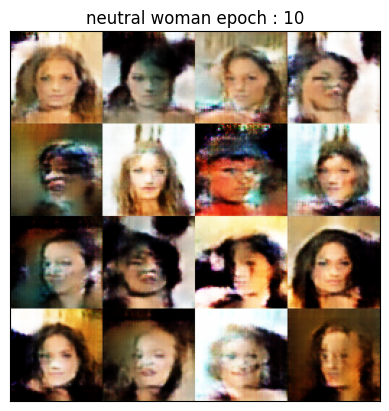

In [106]:
plt.imshow(frame.permute(1,2,0))
plt.title('neutral woman epoch : {}'.format(10))
plt.xticks([])
plt.yticks([])
plt.savefig('./result/DCGAN_generator_epoch9.png')
plt.show()

In [107]:
im = [Image.open(i) for i in glob.glob('result/*epoch*.png')]
im[0].save('result/neutral_woman_epoch.gif', save_all=True, append_images=im[1:],loop=0xff, duration=1000)

### Vector arithmetic

In [153]:
unnormalize = transforms.Normalize((-0.5 / 0.5, -0.5 / 0.5, -0.5 / 0.5), (1.0 / 0.5, 1.0 / 0.5, 1.0 / 0.5))
fixed_z = torch.randn(16, 100, 1, 1).to(device)

In [154]:
generator_smile_man     = Generator().to(device)
generator_neutral_man   = Generator().to(device)
generator_neutral_woman = Generator().to(device)

generator_smile_man.load_state_dict(torch.load('weights/smileman/DCGAN_generator_epoch10.pt'))
generator_neutral_man.load_state_dict(torch.load('weights/nonsmileman/DCGAN_generator_epoch10.pt'))
generator_neutral_woman.load_state_dict(torch.load('weights/nonsmilewoman/DCGAN_generator_epoch10.pt'))

<All keys matched successfully>

In [155]:
smile_man     = generator_smile_man(fixed_z).detach().to('cpu')
neutral_man   = generator_neutral_man(fixed_z).detach().to('cpu')
neutral_woman = generator_neutral_woman(fixed_z).detach().to('cpu')

smile_woman = unnormalize(neutral_woman + smile_man - neutral_man)

In [156]:
frame = torch.zeros(3, 256, 256)

cnt = 0
for r in range(4):
    for c in range(4):
        frame[:,r*64:(r+1)*64, c*64:(c+1)*64] = smile_woman[cnt]
        cnt+=1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


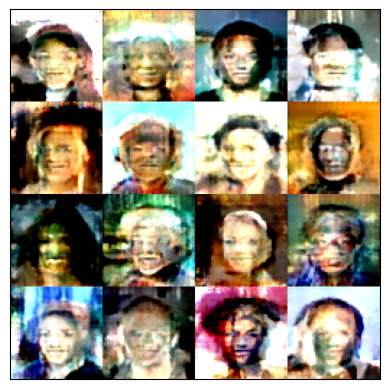

In [157]:
plt.imshow(frame.permute(1,2,0))
plt.xticks([]);plt.yticks([])
plt.savefig('result/Vector arithmetic3.png')
plt.show()

In [158]:
im = [Image.open(i) for i in glob.glob('result/Vector*.png')]
im[0].save('result/vector arithmetic.gif', save_all=True, append_images=im[1:],loop=0xff, duration=1000)

### Walking in the latent Space

In [217]:
def interpolate_points(p1, p2, n_steps=10):
    ratios = np.linspace(0, 1, num=n_steps)
    vs = [(1.0 - r) * p1 + r * p2 for r in ratios]
    return torch.stack(vs)

In [218]:
z = torch.randn(2, 100, 1, 1)

z_interpolation = interpolate_points(z[0], z[1])

generator_neutral_man = Generator().to(device)
generator_neutral_man.load_state_dict(torch.load('weights/nonsmileman/DCGAN_generator_epoch10.pt'))

result = generator_neutral_man(z_interpolation.to(device)).detach().to('cpu')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

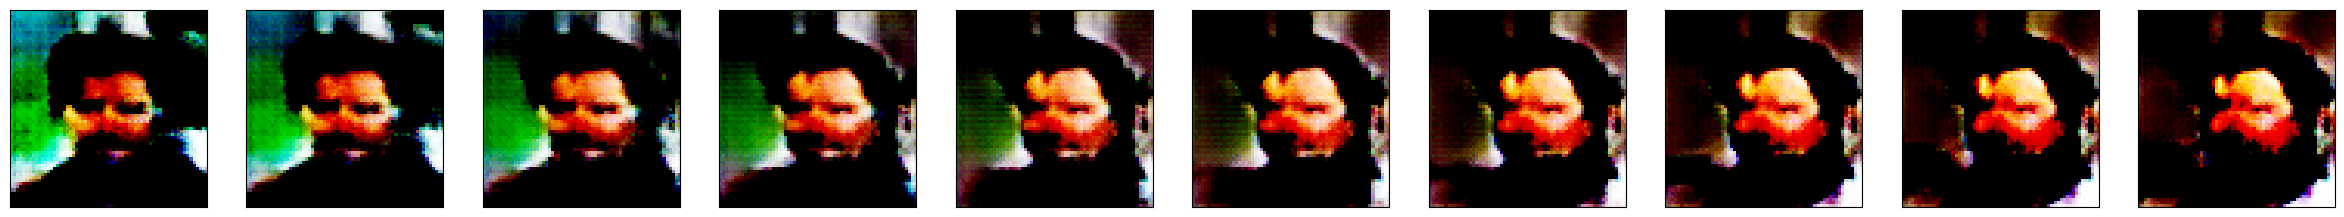

In [216]:
fig, ax = plt.subplots(1, 10, figsize=(30, 30))

for i in range(10):
    ax[i].imshow(result[i].permute(1,2,0))
    ax[i].set_xticks([]);ax[i].set_yticks([])
fig.savefig('Walking in the latent Space.png')